# XGBoost의 개요
XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나  
압도적인 수치 차이는 아니지만 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타냄  
GBM에 기반하지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제 해결

## XGBoost의 장점
1. **뛰어난 예측 성능**  
일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘함  
  
  
2. **GBM 대비 빠른 수행 시간**  
일반적인 GBM은 순차적으로 weak learner가 가중치를 증감하는 방법으로 학습하기 때문에 속도가 느림  
그러나 XGBoost는 병렬 수행 및 다양한 기능으로 빠른 수행 GBM보다 빠른 수행 성능을 보장함  
그렇다고 다른 머신러닝 알고리즘 (랜덤포레스트)에 비해 빠른건 아님  
  
  
3. **과적합 규제**  
표준 GBM은 과적합 규제 기능이 없으나 XGBoost는 자체에 과적합 규제 기능으로  
과적합에 좀 더 강한 내구성을 가질 수 있음  
  
  
4. **가지치기**  
더 이상 긍정 이득이 없는 분할을 가지치기를 해서 분할 수를 더 줄이는 장점이 있음  
  

5. **자체 내장된 교차 검증**  
XGBoost는 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한  
교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있음  
지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면  
반복을 중간에 멈출 수 있는 조기 중단 기능이 있음  
  
  
6. **결손값 자체 처리**  
XGBoost는 결손값을 자체 처리할 수 있는 기능을 가지고 있음

## XGBoost 파이썬 구현
  
(1) XGBoost는 처음에는 C/C++로 작성되었음  
  
(2) 파이썬에서도 XGBoost를 구동할 수 있도록 파이썬 패키지(xgboost) 제공  
* 패키지 역할 : 대부분 C/C++ 핵심 라이브러리를 호출하는 것  
* 사이킷런과 호환되지 않는 독자적인 XGBoost 전용 패키지  
* 따라서 사이킷런의 fit(), predict() 메서드 같은 사이킷런 고유 아키텍처 적용 불가
* 다양한 유틸리티(cross_val_score, GridSearchCV, Pipeline 등)도 사용 불가
* '파이썬 래퍼 XGBoost 모듈'로 지칭
  
(3) 파이썬 기반의 ML 이용자들이 사이킷런을 많이 사용하기 때문에 사이킷런과 연동할 수 있는 래퍼 클래스(Wrapper class) 제공  
* XGBClassifer와 XGBRegressor 래퍼 클래스
*  사이킷런 estimator가 학습을 위해 사용하는 fit()과 predict() 등 
*  표준 사이킷런 개발 프로세스 및 다양한 유틸리티 활용 가능
* '사이킷런 래퍼 XGBoost 모듈'로 지칭

### '파이썬 래퍼 XGBoost 모듈'과 '사이킷런 래퍼 XGBoost 모듈' 차이점
- '사이킷런 래퍼 XGBoost 모듈' : 사이킷런의 Estimator와 사용법 동일
- '파이썬 래퍼 XGBoost 모듈' : 파이썬 네이티브 XGBoost 고유의 API와 하이퍼 파라미터 이용
- 크게 다르지는 않지만 몇 가지 주의할 점이 있음
- 파이썬 Wrapper : 사이킷런 Wrapper
    - eta : learning_rate  (학습률)
    - num_boost_rounds : n_estimators  (학습기의 개수 : 반복 수행 횟수)

___
# XGBoost의 하이퍼 파라미터

## 일반 파라미터
일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터, default 값을 바꾸는 일은 거의 없음  
  
- **booster**	: gbtree(tree based model) 또는 gblinear(linear model) 중 선택. Default = 'gbtree'
  
   
- **silent** : Default = 0이며, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정
   
   
- **nthread** : CPU 실행 스레드 개수 조정하며, Default는 전체 다 사용하는 것. 멀티코어/스레드 CPU 시스템에서 일부CPU만 사용할 때 변경
  
## 부스터 파라미터
트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭함  
  
- **eta [default=0.3, alias: learning_rate]** : GBM의 학습률(learning rate)과 같은 파라미터이다. 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값, 파이썬 래퍼 기반의 xgboost를 이용할 경우 default는 0.3이고 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며, default는 0.1이다. 보통은 0.01 ~ 0.2 사이의 값을 선호한다.
  
  
- **num_boost_rounds** : GBM의 n_estimators와 같은 파라미터이다.  
  
  
- **min_child_weight [default=1]** : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합, min_child_weight가 클수록 분할을 자제한다. 과적합을 조절하기 위해 사용된다.
  
  
- **gamma [default=0, alias: min_split_loss]** : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값이다. 해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리한다. 값이 클수록 과적합 감소 효과가 있다.
  
  
- **max_depth [default=6]** : 트리 기반 알고리즘의 max_depth와 같다. 0을 지정하면 깊이에 제한이 없다. max_depth가 높으면 특정 피쳐 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용한다.
  
  
- **sub_sample [default=1]** : GBM의 subsample과 동일하다. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정한다. sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용한다. 0에서 1사이의 값이 가능하나 일반적으로 0.5 ~ 1 사이의 값을 사용한다.
  
    
- **colsample_bytree [default=1]** : GBM의 max_feature와 유사하다. 트리 생성에 필요한 피처(column)를 임의로 샘플링하는 데 사용된다. 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용하다.
  
  
- **lambda [default=1, alias: reg_lambda]** : L2 Regularation 적용 값이다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.
  
  
- **alpha [default=0, alias: reg_alpha]** : L1 Regularization 적용 값이다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.
  
  
- **scale_pos_weight [default=1]** : 특정 값으로 치우친 비대칭한 클래스로 구성된 datase의 균형을 유지하기 위한 파라미터이다.
  
  
## 학습 테스트 파라미터
- **objective** : 최솟값을 가져야할 손실 함수를 정의합니다. XGBoost는 많은 유형의 손실함수를 사용할 수 있습니다. 주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 달라진다.
  
  
- **binary:logitic** : 이진 분류일 때 적용한다.
  
  
- **multi:softmax** : 다중 분류일 때 적용한다. 손실함수가 multi:softmax일 경우에는 label 클래스의 개수인 num_class parameter를 지정해야 한다.  
  
  
- **multi:softprob** : multi:softmax와 유사하나 개별 label 클래스의 해당되는 예측 확률을 반환한다.
  
  
- **eval_metric** : 검증에 사용되는 함수를 정의한다. defalut는 회귀인 경우는 rmse, 분류일 경우에는 error이다. 다음은 eval_metric의 값 유형들이다.
    - **rmse** : Root Mean Square Error
    - **mae** : Mean Absolute Error  
    - **logloss** : Negative log-likelihood
    - **error** : Binary classification error rate (0.5 threshold)
    - **merror** : Multiclass classification error rate
    - **mloglose** : Multiclass logloss
    - **auc** : Area under the curve

## 과적합 제어
  
과적합 문제가 심각하다면 다음과 같이 적용할 것을 고려할 수 있다.

- eta 값을 낮춘다.(0.01 ~ 0.1) 그리고 eta 값을 낮추면 num_round(또는 n_estimator)는 반대로 높여준다.
- max_depth 값을 낮춘다.
- min_child_weight 값을 높인다.
- gamma 값을 높인다.
- 또한 subsample과 colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있다.

XGBoost는 자체적으로 교차 검증, 성능 평가, feature 중요도 등의 시각화 기능을 가지고 있고,  
기본 GBM에서 부족한 다른 여러 성능 향상 기능이 있다.  
그 중 수행 속도를 향상시키기 위한 대표적인 기능을 조기 중단(Early Stopping) 기능이 있는데,  
이 기능 덕분에 n_estimator에 지정한 부스팅 반복 횟수에 도달하지 않더라고  
예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하기 않고 중지해 수행 시간을 개선할 수 있다.

___
# XGBoost 설치하기

Anaconda Prompt 관리자 모드로 열고    
`conda install -c anaconda py-xgboost`  
`conda install py-xgboost`  
  
`conda update -n base conda`  
가상환경 안에서 : `pip install xgboost`

In [37]:
# XGBoost 버전 확인

import xgboost

xgboost.__version__

'1.4.2'

___
# XGBoost 예제 : 위스콘신 유방암 예측

(1) 파이썬 래퍼(Wrapper) XGBoost 적용  
(2) 사이킷런 래퍼(Wrapper) XGBoost 적용  
  
사용 데이터 : 위스콘신 Breast Cancer 데이터 셋  

#### 파이썬 래퍼(Wrapper) XGBoost 적용  
XGBoost를 이용해서 위스콘신 유방암 데이터 세트에 기반해 종양의 다양한 피처에 따라  
악성 종양인지 일반 양성 종양인지 예측

#### 위스콘신 유방암 데이터 세트
종양의 크기, 모양 등의 다양한 속성값(피처)을 기반으로  
악성 종양(malignant)인지 양성 종양(benign)인지를분류한 세트  
- 양성 : 제거하여 치유할 수 있는 종양. 성장 속도 느리고 전이되지 않음  
- 악성 : 암. 빠르게 성장하고 전이되어 생명 위협  

#### xbboost : XGBoost의 파이썬 패키지
자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능 포함  
조기 중단 기능으로 수행 시간 개선. 빠른 수행시간 처리 가능하지만  
CPU 코어가 많지 않은 개인용 PC에서는 수행시간 향상 효과 보기 어려움  

## 데이터 임포트, 로드

In [38]:
# 데이터 세트 로드
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

# 데이터 프레임으로 생성
cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

# 위의 데이터셋에서 악성종양은 0, 양성은 1 값으로 되어 있음

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


위의 데이터셋에서 타깃 레이블 값의 종류는 악성인 'malignent'가 0값으로,  
양성인 'benign'이 1 값으로 되어 있음. 레이블 분포를 확인해 보자

## 레이블 값 분포 확인

In [39]:
# 레이블 값 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


1값인 양성(benign)이 357개, 0값인 악성 malignant가 212개로 구성되어 있음  
이제 전체 데이터 세트 중 80%를 학습용으로, 20%를 테스트용으로 분할해 보자  

## 학습용, 테스트용 데이터로 분리

In [40]:
# 전체 데이터 중에서 80%는 학습용 데이터, 20%는 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, 
                                                    test_size=0.2, random_state=156)

print(X_train.shape, X_test.shape)

# 학습용 피처 데이터 세트, 테스트용 피처 데이터세트
# 피처 수 : 30

(455, 30) (114, 30)


파이썬 래퍼 XGBoost는 사이킷런과 차이가 여러 가지가 있지만,  
큰 차이는 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성한다는 점 입니다.  
DMatrix는 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트입니다.  
  
파이썬 xgboost를 사용하려면 DMatrix 타입으로 변환해야 함  
변환된 학습용, 테스트용 데이터 세트 생성  

## xgboost를 사용하기 위해 DMatirix 타입으로 변환

In [41]:
# 파이썬 xgboost를 사용하려면 DMatrix 타입으로 변환해야 함
# 변환된 학습용, 테스트용 데이터 세트 생성
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

## 하이퍼 파라미터 설정
파이썬 래퍼 XGBoost 모듈인 xgboost를 이용해 학습을 수행하기 전에  
멎너 XGBoost의 하이퍼 파라미터를 설정합니다.  
XGBoost의 하이퍼 파라미터는 주로 딕셔너리 형태로 입력합니다  

* max_depth : 트리 최대 깊이는 3  
* 학습률 eta : 0.1 (XGBClassifier를 사용할 경우 eta가 아니라 learining_rate)
* objective : 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
* eval_metric : 오류 함수의 평가 성능 지표 자체적으로 평가하는데, 손실에 대한 것 측정
* logloss : 오류 함수의 평가 성능 지표
* num_rounds : 부스팅 반복 횟수 400
* early_stoppings : 조기중단을 위한 최소 반복횟수는 100


In [25]:
# 하이퍼 파라미터 설정

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

파이썬래퍼 XGBoost에서 하이퍼 파라미터를 xgboost 모듈의 train( ) 함수에 파라미터로 전달합니다.  
(사이킷런 래퍼는 Estimator 생성자를 하이퍼 파라미터로 전달)  
  
early_stopping_rounds 파라미터 : 조기 중단을 위한 라운드를 설정합니다.  
조기 중단 기능 수행을 위해서는 반드시 eval_set과 eval_metric이 함께 설정되어야 합니다.  

- **eval_set** : 성능평가를 위한 평가용 데이터 세트를 설정
- **eval_metric** : 평가 세트에 적용할 성능 평가 방법
(반복마다 eval_set으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정)
  
  
train() 함수를 호출하면 xgboost가 반복 시마다 evals에 표시된 데이터 세트에 대해 평가 지표를 출력합니다. 그 후 학습이 완료된 모델 객체를 반환합니다.

In [26]:
# 진정한 파라미터로 모델 학습

# train 데이터 셋은 'train', evaluation 데이터 셋은 'eval'로 명기
wlist = [(dtrain, 'train'), (dtest, 'eval')] # eval : 평가용

# early_stopping_rounds=100 : 조기 중단할 수 있는 최소 반복 횟수(Best 이후)
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[23:58:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stoppings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss

[162]	train-logloss:0.00724	eval-logloss:0.08776
[163]	train-logloss:0.00722	eval-logloss:0.08778
[164]	train-logloss:0.00720	eval-logloss:0.08778
[165]	train-logloss:0.00718	eval-logloss:0.08752
[166]	train-logloss:0.00716	eval-logloss:0.08754
[167]	train-logloss:0.00714	eval-logloss:0.08764
[168]	train-logloss:0.00712	eval-logloss:0.08739
[169]	train-logloss:0.00710	eval-logloss:0.08738
[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:

**결과**  
train() 사용해서 학습 수행  
400번 반복하면서 lgoloss 값이 계속 감속  
  
early_stopping_rounds=100으로 설정한 경우  
311번 반복까지만 수행한 후 학습 종료  
211에서 0.085593으로 가장 좋았고 뒤에 더 작은 값 없음  
211 이후 100번 더 반복 동안 성능 평가 지수가 향상되지 못해서 학습 종료  

## predict() 메서드를 이용해 예측을 수행
테스트 데이터 셋에서 예측 수행  
파이썬 래퍼 XGBoost는 train() 함수를 호출해서 학습이 완료된 모델 객체 반환
- 이 모델 객체는 에측 수행할 때 predict() 메서드 사용
- predict()를 통해서 예측 확률값 반환

사이킷런
- predict() : 예측 결과 클래스 값 반환 (0, 1)
- predict_proba() : 예측 확률 반환

In [42]:
# 예측 수행 : 예측 확률값 반환
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해서 List 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시:  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


## XGBoost 모델의 예측 성능 평가

In [43]:
# XGBoost 모델의 예측 성능 평가
# 앞에서 get_clf_eval() 함수 작성했음 (복사해서 사용)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [30]:
# 테스트 : 실제 레이블 값을 가지는 y_test와
# 예측 레이블인 preds 예측 확률값 pred_probas으로
# XGBoost 모델 예측 성능 평가
get_clf_eval(y_test, preds, pred_probs)

# 지금까지 봤던 모델 중 성능 평가 가장 좋음

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


## xgboost로 피처 중요도 막대그래프 시각화
xgboost 패키지에 내장된 시각화 기능 수행  
plot_importance() API : 피처의 중요도를 막대그래프 형식으로 나타냄  
(사이킷 런: Estimator 객체의 feature_importance_ 속을 이용해서 시각화)  

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

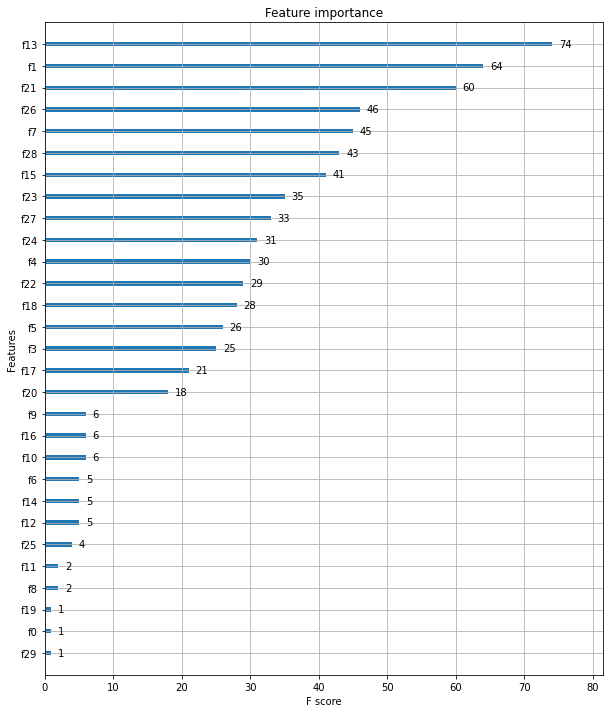

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

# 사이킷런 래퍼 XGBoost의 개요 및 적용

## 특징
사이킷런 Wrapper XGBoost 
* 사이킷런의 기본 Estimator를 그대로 상속해서 만들었기 때문에  
    fit()과 predict() 만으로 학습/예측 가능  
* GridSearchCV,Pipeline 등 사이킷런의 유틸리티를 그대로 사용 가능
* 분류 : XGBClassifier / 회귀 : XGBRegressor
  
## 파이썬 래퍼와 비교시 달라진 파라미터
* eta → learning_rate
* sub_sample → subsample
* lambda → reg_lambda
* alpha → reg_alpha
* num_boost_round → n_estimators
  
위와 동일하게 위스콘신 유방암 데이터를 통한 예측
원래는 검증 데이터 세트로 해야 되는데 데이터 세트가 충분하지 않아서  
train 데이터에서 검증용 데이터를 추출하기에 너무 적음 그래서 테스트 데이터 사용했음

## XGBClassifier 클래스로 학습 예측 수행

In [49]:
# 사이킷런 래퍼 XGBoost 클래스 : XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[00:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


**결과**  
앞 예제의 파이썬 래퍼 XGBoost와 동일한 평가 결과가 나옴  
데이터 세트 크기가 작아서 테스트 데이터를 평가용으로 사용함  

## XGBClassifier 조기 중단하기

In [47]:
# 사이킷런 래퍼 XGBoost 클래스 : XGBClassifier 사용

from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, eval_metric="logloss", verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

# 예측 성능 평가 수행
get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

**결과**    
사이킷런 래퍼 XGBoost 클래스한 결과  
파이썬 래퍼 XGBoost 결과보다 전반적으로 조금 높은(낮은) 수치가 나타났음  
(향상되었다고 볼 수 있겠음(없겠음))  

In [48]:
# 예측 성능 평가 수행
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


**결과**  
조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 큼  
반복하는 동안 성능 평가 지표가 향상되지 않으면 반복이 멈춰 버려서  
충분한 학습이 되지 않아 예측 성능이 나빠질 수 있음 주의  

## XGBClassifier 피처 중요도 막대그래프 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

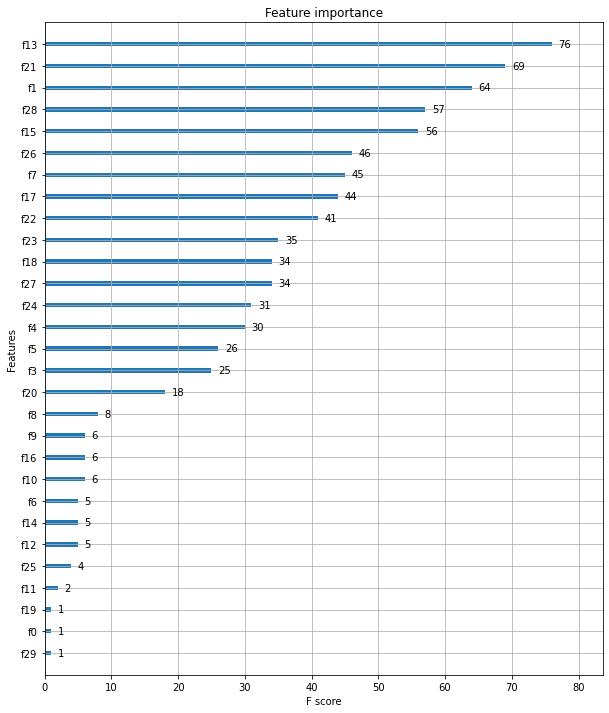

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)